In [1]:
########################################################################
########################################################################
##                                                                    ##
##                      ORIGINAL _ DO NOT PUBLISH                     ##
##                                                                    ##
########################################################################
########################################################################

import torch as tr
import torch
from torch.nn.functional import pad
import torch.nn as nn
import numpy as np
import loader as ld
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


batch_size = 32
output_size = 2
hidden_size = 16        # to experiment with

run_recurrent = False    # else run Token-wise MLP
use_RNN = False          # otherwise GRU
atten_size = 0          # atten > 0 means using restricted self atten

reload_model = False
num_epochs = 10
learning_rate = 0.0001
test_interval = 300

# Loading sataset, use toy = True for obtaining a smaller dataset

train_dataset, test_dataset, num_words, input_size = ld.get_data_set(batch_size)

# Special matrix multipication layer (like torch.Linear but can operate on arbitrary sized
# tensors and considers its last two indices as the matrix.)

class MatMul(nn.Module):
    def __init__(self, in_channels, out_channels, use_bias = True):
        super(MatMul, self).__init__()
        self.matrix = torch.nn.Parameter(torch.nn.init.xavier_normal_(torch.empty(in_channels,out_channels)), requires_grad=True)
        if use_bias:
            self.bias = torch.nn.Parameter(torch.zeros(1,1,out_channels), requires_grad=True)

        self.use_bias = use_bias

    def forward(self, x):        
        x = torch.matmul(x,self.matrix) 
        if self.use_bias:
            x = x+ self.bias 
        return x


class ExMLP(nn.Module):
    def __init__(self, input_size, output_size, hidden_size):
        super(ExMLP, self).__init__()

        self.Sigmoid = torch.nn.Sigmoid()

        # Token-wise MLP network weights
        self.layer1 = MatMul(input_size,hidden_size)
        self.layer2 = MatMul(hidden_size,hidden_size)
        self.layer3 = MatMul(hidden_size,output_size)
        # additional layer(s)
        

    def name(self):
        return "MLP"

    def forward(self, x):

        # Token-wise MLP network implementation
        
        x = self.layer1(x)
        x = self.Sigmoid(x)
        x = self.layer2(x)
        x = self.Sigmoid(x)
        x = self.layer3(x)
        x = self.Sigmoid(x)
        # rest

        return x

# prints portion of the review (20-30 first words), with the sub-scores each work obtained
# prints also the final scores, the softmaxed prediction values and the true label values

def print_review(rev_text, sbs1, sbs2, lbl1, lbl2):
    print(' '.join(rev_text))
    print('word\t\tprediction\tlabel')
    for i in range(len(rev_text)):
        print(f'{rev_text[i]}\t\t{"1" if bool(sbs1[i] > sbs2[i]) else "0"}\t{"1" if bool(lbl1 > lbl2) else "0"}')

# select model to use

/home/orian/PycharmProjects/deepLearning/.venv/lib/python3.10/site-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/home/orian/PycharmProjects/deepLearning/.venv/lib/python3.10/site-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/home/orian/PycharmProjects/deepLearning/.venv/lib/python3.10/site-packages/torchtext

Using model: MLP
Accuracy: 0.53125
Epoch [1/10], Step [300/938], Train Loss: 0.6948, Test Loss: 0.7539
Accuracy: 0.5625
Epoch [1/10], Step [600/938], Train Loss: 0.6911, Test Loss: 0.7040
Accuracy: 0.5625
Epoch [1/10], Step [900/938], Train Loss: 0.6932, Test Loss: 0.6941
Accuracy: 0.375
Epoch [2/10], Step [300/938], Train Loss: 0.6935, Test Loss: 0.6955
Accuracy: 0.5
Epoch [2/10], Step [600/938], Train Loss: 0.6937, Test Loss: 0.6937
Accuracy: 0.5
Epoch [2/10], Step [900/938], Train Loss: 0.6938, Test Loss: 0.6933
Accuracy: 0.65625
Epoch [3/10], Step [300/938], Train Loss: 0.6917, Test Loss: 0.6909
Accuracy: 0.4375
Epoch [3/10], Step [600/938], Train Loss: 0.6931, Test Loss: 0.6935
Accuracy: 0.59375
Epoch [3/10], Step [900/938], Train Loss: 0.6939, Test Loss: 0.6922
Accuracy: 0.625
Epoch [4/10], Step [300/938], Train Loss: 0.6926, Test Loss: 0.6916
Accuracy: 0.375
Epoch [4/10], Step [600/938], Train Loss: 0.6912, Test Loss: 0.6943
Accuracy: 0.4375
Epoch [4/10], Step [900/938], Train L

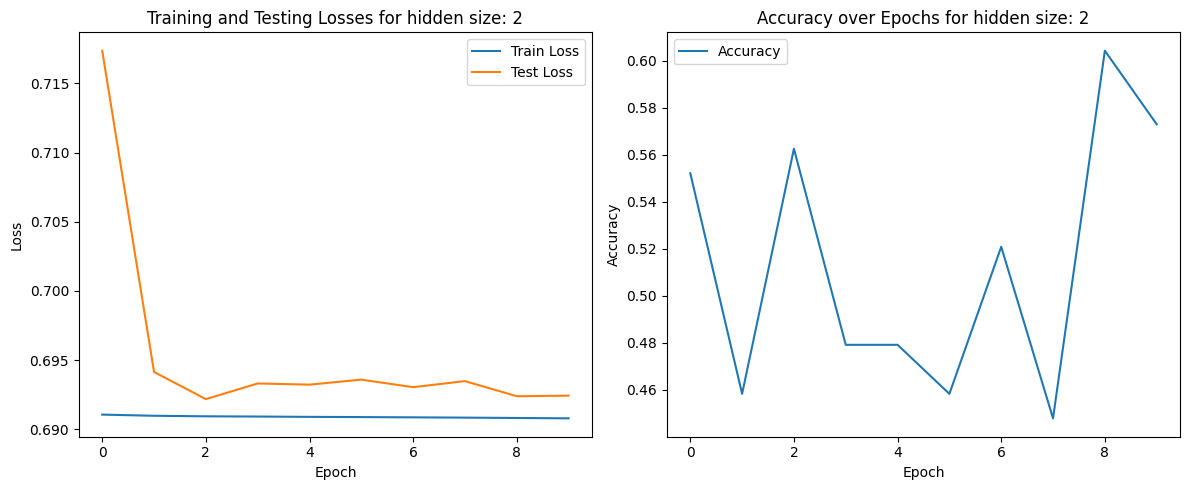

Using model: MLP
Accuracy: 0.59375
Epoch [1/10], Step [300/938], Train Loss: 0.6743, Test Loss: 0.7440
Accuracy: 0.46875
Epoch [1/10], Step [600/938], Train Loss: 0.7037, Test Loss: 0.7098
Accuracy: 0.5625
Epoch [1/10], Step [900/938], Train Loss: 0.6954, Test Loss: 0.6917
Accuracy: 0.4375
Epoch [2/10], Step [300/938], Train Loss: 0.6986, Test Loss: 0.6989
Accuracy: 0.4375
Epoch [2/10], Step [600/938], Train Loss: 0.6911, Test Loss: 0.6996
Accuracy: 0.4375
Epoch [2/10], Step [900/938], Train Loss: 0.6931, Test Loss: 0.6988
Accuracy: 0.53125
Epoch [3/10], Step [300/938], Train Loss: 0.6899, Test Loss: 0.6931
Accuracy: 0.59375
Epoch [3/10], Step [600/938], Train Loss: 0.6899, Test Loss: 0.6898
Accuracy: 0.46875
Epoch [3/10], Step [900/938], Train Loss: 0.6889, Test Loss: 0.6940
Accuracy: 0.59375
Epoch [4/10], Step [300/938], Train Loss: 0.6926, Test Loss: 0.6907
Accuracy: 0.5
Epoch [4/10], Step [600/938], Train Loss: 0.6881, Test Loss: 0.6928
Accuracy: 0.625
Epoch [4/10], Step [900/938],

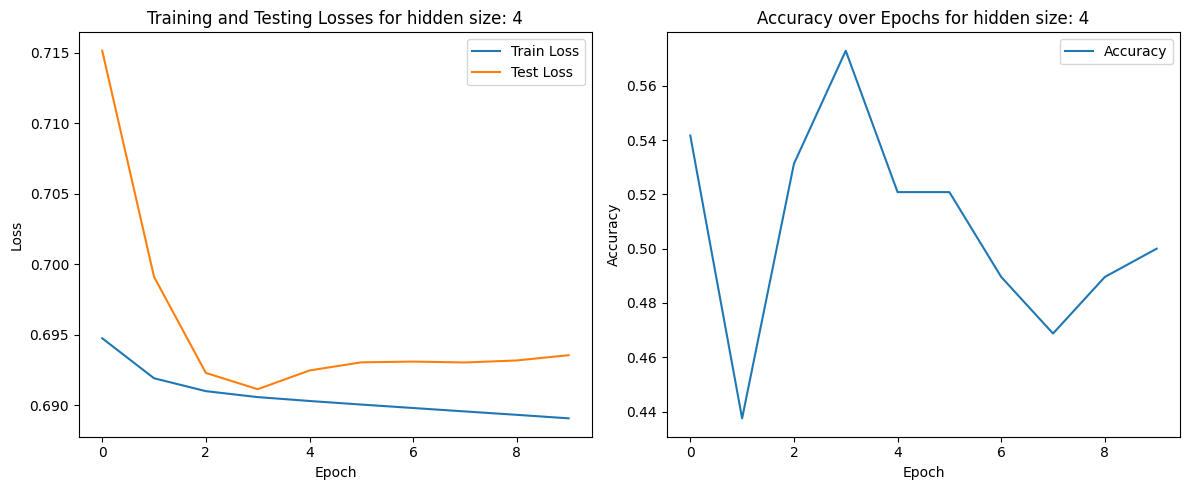

Using model: MLP
Accuracy: 0.53125
Epoch [1/10], Step [300/938], Train Loss: 0.6944, Test Loss: 0.7545
if my expectations weren exceeded they were certainly met nancy drew works both as mystery and comedy it pays homage to the books it was based on and spoofs them at the same time the movie starts with close up on book shelf and an animated credit sequence resembling illustrations from the books it then begins lampooning the books immediately writer director andrew fleming seems to realize the idea of teenage girl regularly breaking up crime rings in small town is ridiculous so he doesn treat the idea religiously he pokes fun at nancy drew ability to do anything such
word		prediction	label
if		1	1
my		1	1
expectations		1	1
weren		1	1
exceeded		1	1
they		1	1
were		1	1
certainly		1	1
met		0	1
nancy		1	1
drew		0	1
works		1	1
both		1	1
as		1	1
mystery		1	1
and		1	1
comedy		1	1
it		1	1
pays		1	1
homage		1	1
to		1	1
the		1	1
books		1	1
it		0	1
was		1	1
based		1	1
on		1	1
and		0	1
spoofs		1	1

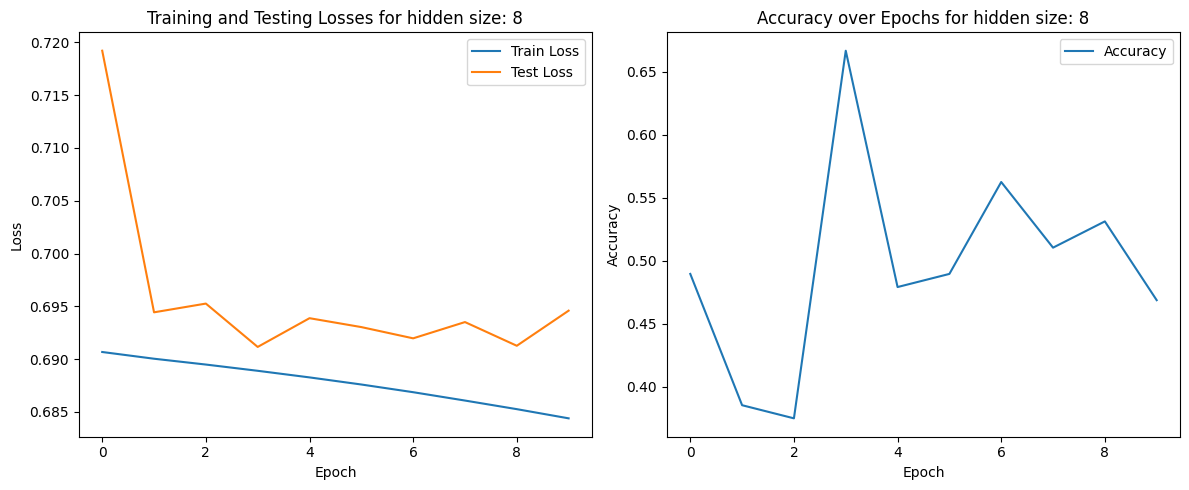

Using model: MLP
Accuracy: 0.375
Epoch [1/10], Step [300/938], Train Loss: 0.6885, Test Loss: 0.7589
at first glance film like northfork town set to be flooded in and group of characters who are sent out to evacuate the remaining townspeople could be just an ordinary film as we soon meet remaining priest taking care of sick child greedy land owner we could be set up for simple story we could all easily digest however when one is first introduced to this film you notice the amazing wide open cinematography and scene involving church hall missing wall that opens up to the pastures and scenic view of the mountains with cattle grazing it soon becomes clear
word		prediction	label
at		1	1
first		1	1
glance		1	1
film		1	1
like		1	1
northfork		1	1
town		1	1
set		1	1
to		1	1
be		1	1
flooded		1	1
in		1	1
and		1	1
group		1	1
of		1	1
characters		1	1
who		1	1
are		1	1
sent		1	1
out		1	1
to		1	1
evacuate		1	1
the		1	1
remaining		1	1
townspeople		1	1
could		1	1
be		1	1
just		1	1
an		1	1
ordinary		1	1

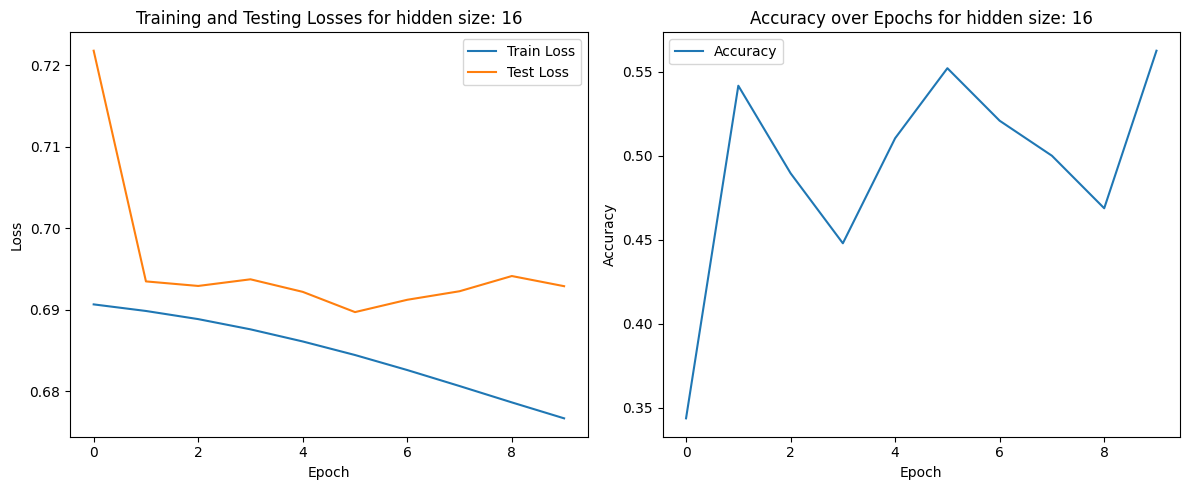

In [2]:
for hidden_size in [2, 4, 8, 16]:
    model = ExMLP(input_size, output_size, hidden_size)

    print("Using model: " + model.name())

    if reload_model:
        print("Reloading model")
        model.load_state_dict(torch.load(model.name() + ".pth"))

    model.cuda()

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    train_loss = 1.0
    test_loss = 1.0

    # training steps in which a test step is executed every test_interval

    model.train()

    train_losses = []
    test_losses = []
    accuracies = []

    for epoch in range(num_epochs):

        itr = 0 # iteration counter within each epoch
        epoch_train_loss = 0
        epoch_test_loss = 0
        epoch_accuracies = []

        for labels, reviews, reviews_text in train_dataset:   # getting training batches

            # test if the model can predict allways False
            # labels = torch.arange(0, 2, dtype=torch.float32).repeat(1024,1).cuda()

            itr = itr + 1

            if (itr + 1) % test_interval == 0:
                test_iter = True
                labels, reviews, reviews_text = next(iter(test_dataset)) # get a test batch 
            else:
                test_iter = False

            # Recurrent nets (RNN/GRU)


            # Token-wise networks (MLP / MLP + Atten.) 
            
                sub_score = model(reviews)

                output = torch.mean(sub_score, 1)
                
            # cross-entropy loss

            loss = criterion(output, labels)

            # optimize in training iterations

            if not test_iter:
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            # averaged losses
            if test_iter:
                test_loss = 0.8 * float(loss.detach()) + 0.2 * test_loss
                epoch_test_loss += test_loss
            else:
                train_loss = 0.9 * float(loss.detach()) + 0.1 * train_loss
                epoch_train_loss += train_loss

            if test_iter:
                accuracy = accuracy_score(torch.argmax(output, dim=1).cpu(), torch.argmax(labels, dim=1).cpu())
                epoch_accuracies.append(accuracy)
                print(f"Accuracy: {accuracy}")
                print(
                    f"Epoch [{epoch + 1}/{num_epochs}], "
                    f"Step [{itr + 1}/{len(train_dataset)}], "
                    f"Train Loss: {train_loss:.4f}, "
                    f"Test Loss: {test_loss:.4f}"
                )

                if not run_recurrent:
                    nump_subs = sub_score.cpu().detach().numpy()
                    labels = labels.cpu().detach().numpy()
                    if hidden_size >= 8:
                        print_review(reviews_text[0], nump_subs[0,:,0], nump_subs[0,:,1], labels[0,0], labels[0,1])

                # saving the model
                torch.save(model, model.name() + ".pth")

        accuracies.append(sum(epoch_accuracies) / len(epoch_accuracies))    
        train_losses.append(epoch_train_loss / len(train_dataset))
        test_losses.append(epoch_test_loss / (len(train_dataset) // test_interval))


    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(num_epochs), train_losses, label='Train Loss')
    plt.plot(range(num_epochs), test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Training and Testing Losses for hidden size: {hidden_size}')

    plt.subplot(1, 2, 2)
    plt.plot(range(len(accuracies)), accuracies, label='Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Accuracy over Epochs for hidden size: {hidden_size}')

    plt.tight_layout()
    plt.show()

In [20]:

from loader import preprocess_review, MAX_LENGTH

model_type = 'MLP'
model = torch.load(f"{model_type}.pth")

review_hard_for_rnn1 = "great movie, best movie ever watched, you should watch it"
review_hard_for_rnn_rep = preprocess_review(review_hard_for_rnn1).cuda()


sub_score = model(review_hard_for_rnn_rep)
output = torch.mean(sub_score.squeeze(), 0)

model_pred = "positive" if output[0] > output[1] else "negative"
model_type = model.name()
print(f'for {model_type} => {model_pred}')


for MLP => positive


In [21]:
review_hard_for_rnn1 = "great movie, best movie ever watched, you should watch it"
review_hard_for_rnn_rep = preprocess_review(review_hard_for_rnn1).cuda()


sub_score = model(review_hard_for_rnn_rep)
output = torch.mean(sub_score.squeeze(), 0)
output

tensor([0.5215, 0.4617], device='cuda:0', grad_fn=<MeanBackward1>)